In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from robot import *
% matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
stats = pd.read_csv('data/output.txt', sep='\\t', engine='python')

In [3]:
stats.describe()

,cte,speed,angle,d_error,i_error,p_error,steering_angle,throttle
count,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000,4619.000000
mean,0.008048,55.361881,-1.114649,0.000102,63.882692,0.008048,-0.066103,0.654931
std,0.663494,15.361024,6.108973,0.046786,62.569192,0.663494,0.312485,0.165320
min,-2.735600,0.000000,-25.000000,-1.320700,-126.877100,-2.735600,-8.355914,0.010000
25%,-0.252200,52.022500,-3.509200,-0.007000,36.230600,-0.252200,-0.138017,0.612566
50%,-0.045700,60.973900,-0.627300,0.000000,47.331500,-0.045700,-0.045158,0.712928
75%,0.219750,64.337800,1.487950,0.000100,95.901950,0.219750,0.026004,0.761911
max,3.773800,72.028100,25.000000,1.346800,316.503500,3.773800,7.913863,0.799977


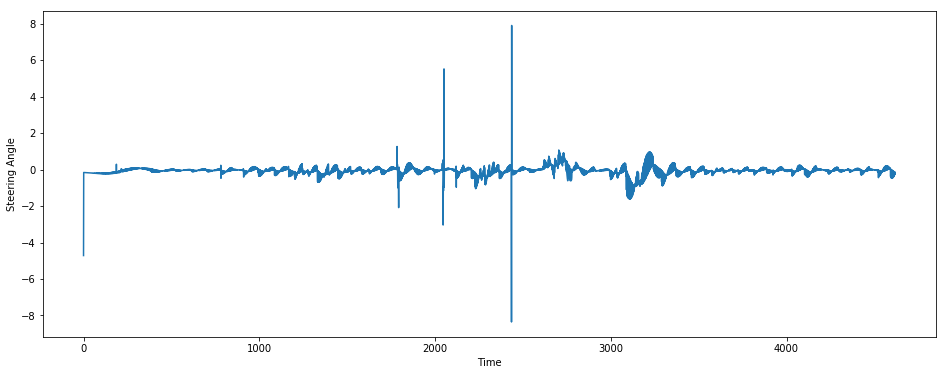

In [4]:
plt.plot(stats["steering_angle"])
plt.xlabel('Time')
plt.ylabel('Steering Angle')
# plt.ylim(-1,1)
plt.show()

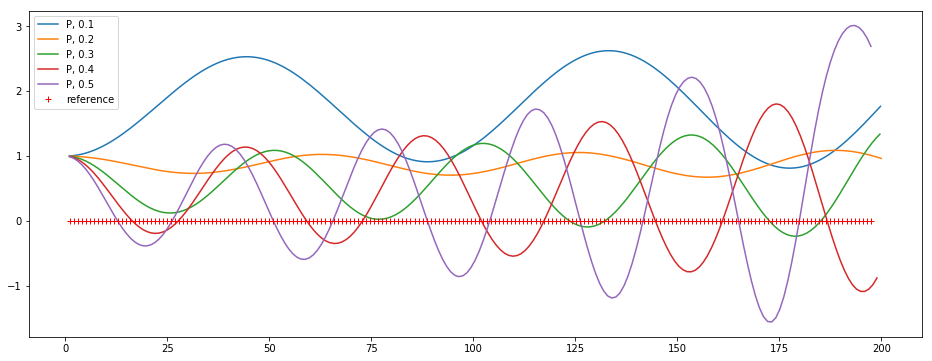

In [5]:
sample_vals = [0.1, 0.2, 0.3, 0.4, 0.5]

x_trajectory = []
y_trajectory = []
for p_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [p_val, 0, 0])
    plt.plot(x_trajectory, y_trajectory, label='P, %s' % p_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


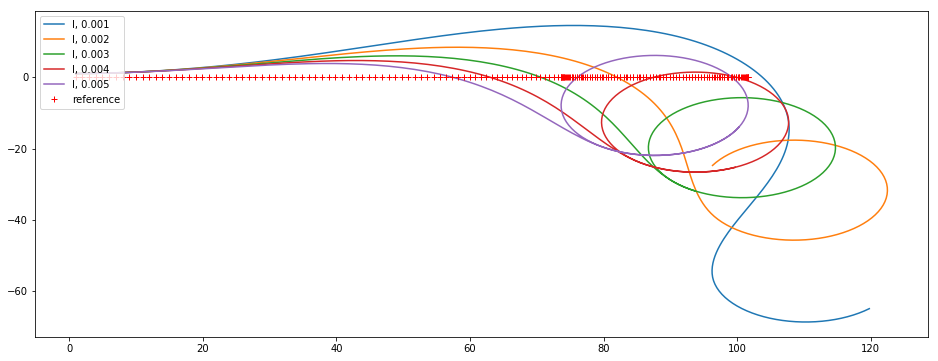

In [6]:
sample_vals = [0.001, 0.002, 0.003, 0.004, 0.005]

x_trajectory = []
y_trajectory = []
for i_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [0, i_val, 0])
    plt.plot(x_trajectory, y_trajectory, label='I, %s' % i_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


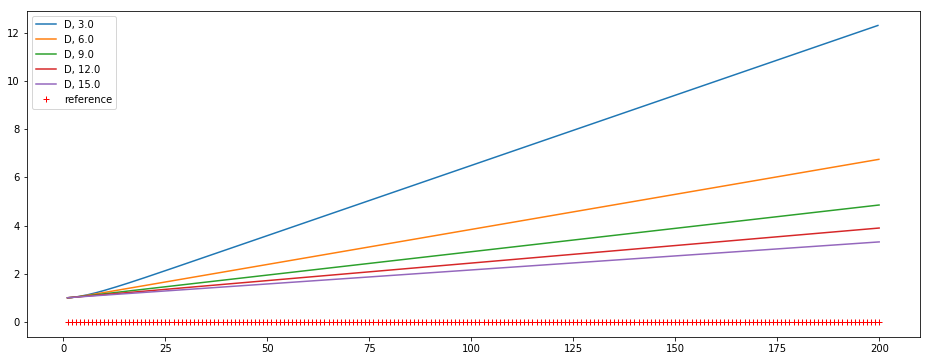

In [7]:
sample_vals = [3.0, 6.0, 9.0, 12.0, 15.0]

x_trajectory = []
y_trajectory = []
for d_val in sample_vals:
    x_trajectory, y_trajectory, err = run(make_robot(), [0, 0, d_val])
    plt.plot(x_trajectory, y_trajectory, label='D, %s' % d_val)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper left')
plt.show()


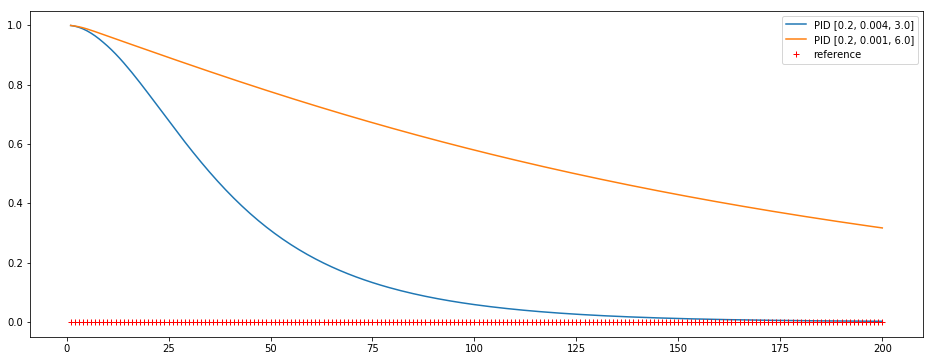

In [8]:
experiments = [[0.2, 0.004, 3.0], [0.2, 0.001, 6.0]]

x_trajectory = []
y_trajectory = []
for exper in experiments:
    x_trajectory, y_trajectory, err = run(make_robot(), exper)
    plt.plot(x_trajectory, y_trajectory, label='PID %s' % exper)

n = len(x_trajectory)
plt.plot(x_trajectory, np.zeros(n), 'r+', label='reference')
plt.legend(loc='upper right')
plt.show()
